In [1]:
# importacion librerias
import simpy
import random
import matplotlib.pyplot as pp

# variables

In [2]:
MAX_VACUNAS = 50
NUM_MESAS = 3
PACIENTES = 200
INTERVALO_LLEGADA = 20 #minutos
TIEMPO_SIMULACION = 480 #Minutos = 8 horas
INTERVALO = 10
tiempo_vacunacion={}
paciente_vac =[]
paciente_no_vac = []

# clase y metodos

In [3]:

class Punto(object):
    
    def __init__(self, environment, num_mesas, nombre):
        # Guardamos como variable el entorno de ejecucion
        self.env=environment
        # Creamos el recurso que representa las maquinas
        self.mesas = simpy.Resource(environment, num_mesas)
        self.nombre = nombre
        
    #Proceso de control, para toma de signos vitales y valida estar dentro del padron
    def control_paciente(self, paciente):
        t_con = random.randint(2,5)
        yield self.env.timeout(t_con)
            
    #Para traslado a la cama/silla de vacunacion y se inyecta
    def vacunar_paciente(self, paciente):
        t_vacunacion = random.randint(5,10)
        print("Tiempo tomado: ",t_vacunacion," para paciente: ",paciente)
        yield self.env.timeout(t_vacunacion)
        
        k = int(paciente.strip('Paciente-'))
        print("Paciente ",k)
        if k in tiempo_vacunacion:
            tiempo_vacunacion[k]=tiempo_vacunacion[k]+1
        else:
            tiempo_vacunacion[k]=t_vacunacion
            
    #Traslado para la salida del paciente
    def salida_paciente(self,paciente):
        t_salida = random.randint(1,3)
        yield self.env.timeout(t_salida)
        
        
       
    
def entra_paciente(env, nombre,punto):
    # Usamos el reloj de la simulacion (env.now()) para indicar a la
    # hora que llega el vehiculo con el nombre pasado como parametro
    print('Llega el paciente: %s a la hora %.2f.' % (nombre, env.now))
    
    # Especificamos que vamos a usar un recurso (Resource) que representa
    # la maquina de lavado
    with punto.mesas.request() as mesa:
        # Ocupamos la mesa de vacunacion
        yield mesa
        #Indicamos que el paciente se esta trasladando para ser vacunado
        print('Se traslada el paciente: %s a la hora %.2f.' % (nombre,env.now))
        #Procesamos el traslado del paciente
        yield env.process(punto.control_paciente(nombre))
        
        estado = random.randint(1,2)
        print("Sintomas: ",estado)
        if estado == 1:            
            paciente_no_vac.append(nombre)
            
        else:
            # Indicamos que paciente ingresa a la mesa de vacunacion
            print('Ingresa el paciente a las %s a la hora %.2f.' % (nombre, env.now))
            
            # Se realiza la vacunacion
            yield env.process(punto.vacunar_paciente(nombre))
            # Una vez que termina la llamada con 'yield', se indica que se ha lavado el vehiculo
            print('Paciente [%s] vacunado a las %.2f.' % (nombre, env.now))
            paciente_vac.append(nombre)
            
        yield env.process(punto.salida_paciente(nombre))
        print('Paciente [%s] trasladado a la salida a las %.2f.' %(nombre,env.now))
        




# ejecutar simulacion

In [4]:
        
def ejecutar_simulacion(env,num_mesas, pacientes,intervalo):
    punto = Punto(env,num_mesas,"Cuenca 1")
    for i in range(pacientes):
        env.process(entra_paciente(env,'Paciente-%d'%(i+1),punto))
    while True:
        yield env.timeout(random.randint(intervalo-10,intervalo+10))
        i+=1
        env.process(entra_paciente(env,'Paciente-%d'%(i+1),punto))
    
print("Punto de vacunacion Azogues")

Punto de vacunacion Azogues


# crear entorno

In [5]:

env=simpy.Environment()
print( PACIENTES)
env.process(ejecutar_simulacion(env, NUM_MESAS,PACIENTES,INTERVALO))



200


<Process(ejecutar_simulacion) object at 0x1c1ec9ec5b0>

# ejecutar proceso

In [6]:
env.run(until = TIEMPO_SIMULACION)

Llega el paciente: Paciente-1 a la hora 0.00.
Llega el paciente: Paciente-2 a la hora 0.00.
Llega el paciente: Paciente-3 a la hora 0.00.
Llega el paciente: Paciente-4 a la hora 0.00.
Llega el paciente: Paciente-5 a la hora 0.00.
Llega el paciente: Paciente-6 a la hora 0.00.
Llega el paciente: Paciente-7 a la hora 0.00.
Llega el paciente: Paciente-8 a la hora 0.00.
Llega el paciente: Paciente-9 a la hora 0.00.
Llega el paciente: Paciente-10 a la hora 0.00.
Llega el paciente: Paciente-11 a la hora 0.00.
Llega el paciente: Paciente-12 a la hora 0.00.
Llega el paciente: Paciente-13 a la hora 0.00.
Llega el paciente: Paciente-14 a la hora 0.00.
Llega el paciente: Paciente-15 a la hora 0.00.
Llega el paciente: Paciente-16 a la hora 0.00.
Llega el paciente: Paciente-17 a la hora 0.00.
Llega el paciente: Paciente-18 a la hora 0.00.
Llega el paciente: Paciente-19 a la hora 0.00.
Llega el paciente: Paciente-20 a la hora 0.00.
Llega el paciente: Paciente-21 a la hora 0.00.
Llega el paciente: Pac

# grafica

[(3, 6), (5, 10), (8, 9), (11, 8), (12, 6), (14, 9), (15, 5), (16, 6), (18, 5), (21, 10), (23, 6), (25, 8), (27, 8), (28, 9), (29, 8), (30, 10), (32, 7), (34, 10), (37, 7), (40, 7), (46, 7), (47, 6), (48, 7), (51, 5), (52, 7), (53, 8), (54, 10), (59, 9), (61, 5), (63, 9), (65, 5), (66, 5), (67, 7), (72, 5), (73, 8), (74, 9), (78, 7), (80, 6), (81, 5), (83, 8), (84, 8), (86, 9), (87, 10), (89, 8), (91, 5), (96, 7), (100, 5), (102, 8), (103, 8), (104, 8), (106, 7), (108, 10), (110, 5), (111, 5), (113, 5), (114, 7), (115, 10), (117, 6), (118, 7), (121, 10), (123, 8), (124, 10), (128, 10), (129, 10), (132, 10), (135, 7), (136, 10), (137, 6), (140, 7), (141, 9), (144, 7), (147, 5), (148, 7), (149, 6), (155, 10), (156, 6)]


Text(0.5, 0, 'Tiempo')

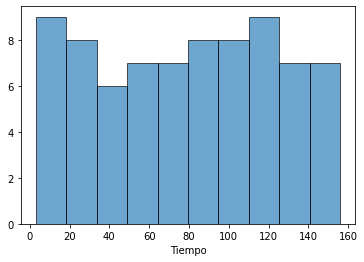

In [7]:

datos=sorted(tiempo_vacunacion.items())
print(datos)
x, y =zip(*datos)
result = pp.hist(x,bins=10,edgecolor='k',alpha=0.65)
pp.xlabel("Tiempo")

# tiempo promedio de vacunacion

In [8]:

valor = 0
for val in tuple(tiempo_vacunacion.values()):
    valor = valor+val
print("Promedio",valor/len(tiempo_vacunacion))

Promedio 7.473684210526316


# resultado obtenidos

In [9]:
print("Total de pacientes ",PACIENTES)
print("Vacunados ", len(paciente_vac))
print("No vacunados ", len(paciente_no_vac))
atendidos = PACIENTES-(len(paciente_vac)+len(paciente_no_vac))
print("Pacientes no atendidos",atendidos)

Total de pacientes  200
Vacunados  76
No vacunados  83
Pacientes no atendidos 41
